# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras import regularizers

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation',
                                            shuffle=True)

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [3]:
model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=64, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(0.0005), bias_regularizer=regularizers.l2(0.0005)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0005), bias_regularizer=regularizers.l2(0.0005))) 
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.9))

model.add(GlobalAveragePooling2D())
model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      3136      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 56, 56, 128)       512       
__________

### Train

In [5]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 200

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch27.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=200,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=100,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
200/200 [==============================] - 132s 662ms/step - loss: 5.3655 - acc: 0.0127 - val_loss: 5.3444 - val_acc: 0.0123

Epoch 00001: val_loss improved from inf to 5.34438, saving model to Saved_Models/weights.best.from_scratch27.hdf5
Epoch 2/200
200/200 [==============================] - 127s 635ms/step - loss: 5.2271 - acc: 0.0186 - val_loss: 5.4128 - val_acc: 0.0164

Epoch 00002: val_loss did not improve from 5.34438
Epoch 3/200
200/200 [==============================] - 127s 637ms/step - loss: 5.1623 - acc: 0.0248 - val_loss: 5.1134 - val_acc: 0.0237

Epoch 00003: val_loss improved from 5.34438 to 5.11340, saving model to Saved_Models/weights.best.from_scratch27.hdf5
Epoch 4/200
200/200 [==============================] - 127s 637ms/step - loss: 5.0823 - acc: 0.0284 - val_loss: 5.9385 - val_acc: 0.0119

Epoch 00004: val_loss did not improve from 5.11340
Epoch 5/200
200/200 [==============================] - 128s 638ms/

200/200 [==============================] - 127s 636ms/step - loss: 4.2273 - acc: 0.1209 - val_loss: 5.0622 - val_acc: 0.0449

Epoch 00040: val_loss did not improve from 4.74646
Epoch 41/200
200/200 [==============================] - 128s 638ms/step - loss: 4.1999 - acc: 0.1314 - val_loss: 4.8838 - val_acc: 0.0591

Epoch 00041: val_loss did not improve from 4.74646
Epoch 42/200
200/200 [==============================] - 127s 636ms/step - loss: 4.2108 - acc: 0.1305 - val_loss: 4.7776 - val_acc: 0.0657

Epoch 00042: val_loss did not improve from 4.74646
Epoch 43/200
200/200 [==============================] - 127s 637ms/step - loss: 4.1468 - acc: 0.1286 - val_loss: 4.6442 - val_acc: 0.0706

Epoch 00043: val_loss improved from 4.74646 to 4.64422, saving model to Saved_Models/weights.best.from_scratch27.hdf5
Epoch 44/200
200/200 [==============================] - 128s 639ms/step - loss: 4.1677 - acc: 0.1264 - val_loss: 4.7666 - val_acc: 0.0632

Epoch 00044: val_loss did not improve from 4.64

200/200 [==============================] - 128s 638ms/step - loss: 3.8077 - acc: 0.1875 - val_loss: 4.8899 - val_acc: 0.0651

Epoch 00082: val_loss did not improve from 4.53141
Epoch 83/200
200/200 [==============================] - 127s 637ms/step - loss: 3.7706 - acc: 0.1923 - val_loss: 4.8782 - val_acc: 0.0728

Epoch 00083: val_loss did not improve from 4.53141
Epoch 84/200
200/200 [==============================] - 127s 637ms/step - loss: 3.7876 - acc: 0.1928 - val_loss: 4.7181 - val_acc: 0.0689

Epoch 00084: val_loss did not improve from 4.53141
Epoch 85/200
200/200 [==============================] - 127s 637ms/step - loss: 3.7810 - acc: 0.1902 - val_loss: 5.1125 - val_acc: 0.0591

Epoch 00085: val_loss did not improve from 4.53141
Epoch 86/200
200/200 [==============================] - 128s 639ms/step - loss: 3.7795 - acc: 0.1903 - val_loss: 4.5854 - val_acc: 0.0927

Epoch 00086: val_loss did not improve from 4.53141
Epoch 87/200
200/200 [==============================] - 127s 63


Epoch 00123: val_loss did not improve from 4.44250
Epoch 124/200
200/200 [==============================] - 126s 630ms/step - loss: 3.6251 - acc: 0.2122 - val_loss: 4.6340 - val_acc: 0.0906

Epoch 00124: val_loss did not improve from 4.44250
Epoch 125/200
200/200 [==============================] - 127s 633ms/step - loss: 3.5998 - acc: 0.2266 - val_loss: 4.6424 - val_acc: 0.0852

Epoch 00125: val_loss did not improve from 4.44250
Epoch 126/200
200/200 [==============================] - 126s 629ms/step - loss: 3.6171 - acc: 0.2178 - val_loss: 4.6305 - val_acc: 0.0908

Epoch 00126: val_loss did not improve from 4.44250
Epoch 127/200
200/200 [==============================] - 126s 632ms/step - loss: 3.6268 - acc: 0.2156 - val_loss: 5.0177 - val_acc: 0.0591

Epoch 00127: val_loss did not improve from 4.44250
Epoch 128/200
200/200 [==============================] - 126s 631ms/step - loss: 3.5987 - acc: 0.2202 - val_loss: 4.6462 - val_acc: 0.0814

Epoch 00128: val_loss did not improve from 4

200/200 [==============================] - 126s 631ms/step - loss: 3.4868 - acc: 0.2450 - val_loss: 4.4368 - val_acc: 0.1187

Epoch 00166: val_loss did not improve from 4.37016
Epoch 167/200
200/200 [==============================] - 126s 629ms/step - loss: 3.4763 - acc: 0.2433 - val_loss: 4.5601 - val_acc: 0.0956

Epoch 00167: val_loss did not improve from 4.37016
Epoch 168/200
200/200 [==============================] - 126s 629ms/step - loss: 3.4943 - acc: 0.2331 - val_loss: 4.6520 - val_acc: 0.0997

Epoch 00168: val_loss did not improve from 4.37016
Epoch 169/200
200/200 [==============================] - 126s 631ms/step - loss: 3.4803 - acc: 0.2381 - val_loss: 4.4046 - val_acc: 0.1195

Epoch 00169: val_loss did not improve from 4.37016
Epoch 170/200
200/200 [==============================] - 125s 625ms/step - loss: 3.4724 - acc: 0.2381 - val_loss: 4.5351 - val_acc: 0.1085

Epoch 00170: val_loss did not improve from 4.37016
Epoch 171/200
200/200 [==============================] - 12

In [6]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0.0,5.344377,0.012264,5.365254,0.012712
1,1.0,5.412771,0.016352,5.226997,0.018675
2,2.0,5.113399,0.023734,5.160885,0.024953
3,3.0,5.938520,0.011950,5.079670,0.028562
4,4.0,5.145985,0.028931,5.059675,0.029975
5,5.0,5.549749,0.013608,5.016894,0.032329
6,6.0,5.156899,0.025157,4.950626,0.036880
7,7.0,5.007583,0.037107,4.921596,0.042687
8,8.0,5.039366,0.028165,4.905026,0.043471
9,9.0,5.131009,0.020126,4.854545,0.048336


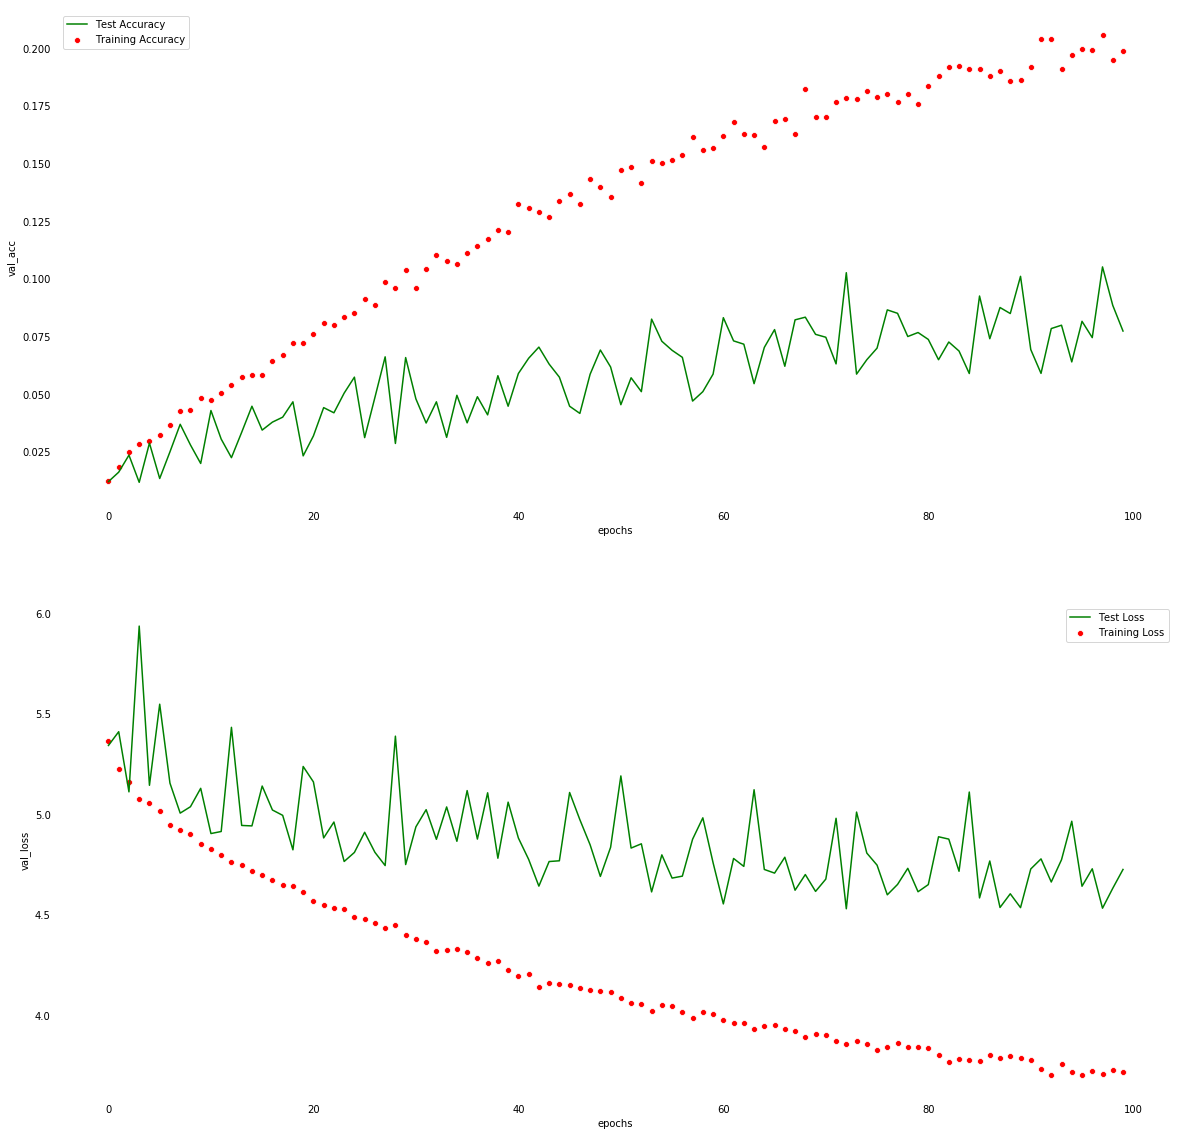

In [7]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters